# ABOUT
- this notebook performs **hypothesis testing for effect of margin**
- Background:
    - margin is a hyperparameter that resides in the SimpleX CCL Loss function
    - we want to test if this hyperparameter has any significant positive effect 
- Approach:
    - we conduct a Paired/dependent T-test
        - randomly sample 20 hyperparameter sets
        - each set consists of 6 hyperparameters: 'embedding_size', 'margin', 'negative_weight', 'neg_seq_len', 'gamma', 'history_len'
        - each paired sample consists of margin!=0 (a) and margin==0 (b)
        - evaluate all sets using SimpleX on ml-100k dataset
        - use a paired t-test at 5% significance
        - let d=a-b
        - https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/
- finding 1:
    - H0: d<=0, H1:d>0
    - the paired samples from the final epoch - epoch 20
    - Since p-value = 0.293 > 0.05, we do not reject the null hypothesis 
    - Margin does not have a significant positive effect

- finding 2:
    - H0: d<=0, H1:d>0
    - take a paired sample over every epoch
    - Since p-value = 8.790411215338783e-05 < 0.05, we reject the null hypothesis 
    - Margin does have a significant positive effect

## Hypothesis test 1
- If we compare just compare the performance at epoch 10, then there is not enough evidence to show that margin has a significant positive effect on recall@10
- p-value: 0.293

In [11]:
import pandas as pd
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\margin_ablation_study.csv"
results = pd.read_csv(path)
results

,Name,external_config_dict.margin,valid/ndcg@10,valid/ndcg@20,valid/recall@10,valid/recall@20
0,SimpleX-30-0.0-0.7-43-20-61-0.001,0.0,0.2523,0.2647,0.1637,0.2541
1,SimpleX-30-0.4-0.7-43-20-61-0.001,0.4,0.2635,0.2793,0.1687,0.2672
2,SimpleX-37-0.0-0.0-79-10-52-0.001,0.0,0.2690,0.2894,0.1634,0.2722
3,SimpleX-37-0.4-0.0-79-10-52-0.001,0.4,0.2801,0.2975,0.1716,0.2779
4,SimpleX-20-0.0-0.5-71-32-51-0.001,0.0,0.2205,0.2355,0.1461,0.2322
5,SimpleX-20-0.3-0.5-71-32-51-0.001,0.3,0.2024,0.2221,0.1396,0.2243
6,SimpleX-43-0.0-0.7-44-25-48-0.001,0.0,0.2477,0.2617,0.1632,0.2549
7,SimpleX-43-0.3-0.7-44-25-48-0.001,0.3,0.2524,0.2672,0.1648,0.2556
8,SimpleX-38-0.0-0.2-45-97-89-0.001,0.0,0.1293,0.1450,0.0911,0.1466
9,SimpleX-38-0.4-0.2-45-97-89-0.001,0.4,0.1588,0.1745,0.1030,0.1750


In [12]:
from numpy import array,mean,sqrt
from statistics import stdev

def get_dependent_samples(df, dependent_variable, independent_variable):
    a = results.loc[results[dependent_variable]!=0, independent_variable].tolist()
    b = results.loc[results[dependent_variable]==0, independent_variable].tolist()
    return a, b

def dependent_t_test(a, b):
    a,b = array(a),array(b)
    d = a-b
    t = mean(d)/(stdev(d)/sqrt(len(d)))
    return t

In [13]:
a,b = get_dependent_samples(results, "external_config_dict.margin","valid/recall@10")

In [ ]:
dependent_t_test(a, b)

In [15]:
import scipy.stats as stats
stats.ttest_rel(a,b, alternative = "greater")

Ttest_relResult(statistic=0.5520982742277416, pvalue=0.2936586014341665)

## Plot generation

In [6]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\margin_ablation_study_plots.csv"
results0 = pd.read_csv(path)
results0 = results0[[col for col in results0.columns if "MAX" in col or col=="Step"]]
results0 = results0.ffill()
results0

,Step,SimpleX-30-0.0-0.7-43-20-61-0.001 - valid/recall@10__MAX,SimpleX-30-0.4-0.7-43-20-61-0.001 - valid/recall@10__MAX,SimpleX-37-0.0-0.0-79-10-52-0.001 - valid/recall@10__MAX,SimpleX-37-0.4-0.0-79-10-52-0.001 - valid/recall@10__MAX,SimpleX-20-0.0-0.5-71-32-51-0.001 - valid/recall@10__MAX,SimpleX-20-0.3-0.5-71-32-51-0.001 - valid/recall@10__MAX,SimpleX-43-0.0-0.7-44-25-48-0.001 - valid/recall@10__MAX,SimpleX-43-0.3-0.7-44-25-48-0.001 - valid/recall@10__MAX,SimpleX-38-0.0-0.2-45-97-89-0.001 - valid/recall@10__MAX,...,SimpleX-32-0.0-1.0-46-63-43-0.001 - valid/recall@10__MAX,SimpleX-32-0.7-1.0-46-63-43-0.001 - valid/recall@10__MAX,SimpleX-57-0.0-0.2-63-15-87-0.001 - valid/recall@10__MAX,SimpleX-57-0.6-0.2-63-15-87-0.001 - valid/recall@10__MAX,SimpleX-12-0.0-0.1-51-72-41-0.001 - valid/recall@10__MAX,SimpleX-12-0.9-0.1-51-72-41-0.001 - valid/recall@10__MAX,SimpleX-23-0.0-1.0-45-72-30-0.001 - valid/recall@10__MAX,SimpleX-23-0.8-1.0-45-72-30-0.001 - valid/recall@10__MAX,SimpleX-46-0.0-0.9-71-64-11-0.001 - valid/recall@10__MAX,SimpleX-46-0.1-0.9-71-64-11-0.001 - valid/recall@10__MAX
0,1,0.0600,0.1097,0.1447,0.1458,0.0673,0.0787,0.0550,0.1120,0.0616,...,0.0405,0.0653,0.1470,0.1444,0.0242,0.0699,0.0425,0.0513,0.0502,0.0595
1,3,0.1011,0.1331,0.1455,0.1537,0.0833,0.1032,0.1043,0.1345,0.0539,...,0.0780,0.0922,0.1559,0.1607,0.0363,0.0760,0.0622,0.0834,0.0764,0.0964
2,5,0.1240,0.1429,0.1494,0.1591,0.1038,0.1122,0.1240,0.1434,0.0655,...,0.1015,0.1057,0.1585,0.1644,0.0250,0.0926,0.0847,0.0951,0.0987,0.1057
3,7,0.1390,0.1549,0.1548,0.1647,0.1145,0.1184,0.1370,0.1527,0.0927,...,0.1108,0.1152,0.1657,0.1712,0.0359,0.0935,0.0969,0.1069,0.1076,0.1060
4,9,0.1456,0.1569,0.1570,0.1653,0.1207,0.1222,0.1511,0.1607,0.0797,...,0.1163,0.1141,0.1690,0.1689,0.0385,0.0999,0.0995,0.1151,0.1173,0.1149
5,11,0.1548,0.1672,0.1533,0.1589,0.1354,0.1274,0.1557,0.1593,0.0911,...,0.1194,0.1227,0.1712,0.1692,0.0422,0.0952,0.1102,0.1198,0.1197,0.1180
6,13,0.1590,0.1667,0.1608,0.1714,0.1314,0.1411,0.1532,0.1574,0.0949,...,0.1189,0.1199,0.1769,0.1722,0.0422,0.0848,0.1171,0.1237,0.1230,0.1111
7,15,0.1608,0.1681,0.1617,0.1705,0.1361,0.1389,0.1582,0.1630,0.0894,...,0.1185,0.1249,0.1758,0.1717,0.0422,0.1122,0.1116,0.1220,0.1180,0.1157
8,17,0.1603,0.1708,0.1621,0.1679,0.1429,0.1431,0.1609,0.1640,0.0771,...,0.1231,0.1275,0.1738,0.1717,0.0422,0.1024,0.1145,0.1273,0.1230,0.1188
9,19,0.1637,0.1687,0.1634,0.1716,0.1461,0.1396,0.1632,0.1648,0.0911,...,0.1146,0.1269,0.1730,0.1717,0.0422,0.1005,0.1195,0.1357,0.1261,0.1194


In [7]:
def is_margin_zero(colname = 'SimpleX-30-0.0-0.7-43-20-61-0.001 - valid/recall@10__MAX'):
    return colname.split("-")[2]=="0.0"
a_columns = [col for col in results0.columns if col!="Step" and not is_margin_zero(col)]
b_columns = [col for col in results0.columns if col!="Step" and is_margin_zero(col)]

In [9]:
from seaborn import lineplot
import matplotlib.pyplot as plt

In [11]:
temp = {
    "margin!=0":results0[a_columns].mean(axis=1),
    "margin==0":results0[b_columns].mean(axis=1),
    "epochs":list(range(1,11))
}
temp = pd.melt(pd.DataFrame(temp), value_vars = ["margin!=0","margin==0"],id_vars = "epochs")

# Plot

[Text(0.5, 1.0, 'Effect of discriminating against hard negatives'),
 Text(0.5, 0, 'epochs'),
 Text(0, 0.5, 'Recall@10')]

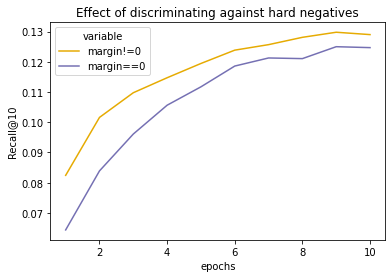

In [13]:
p = lineplot(temp, x = "epochs", y = "value", hue = "variable", palette = "Dark2_r")
p.set(title="Effect of discriminating against hard negatives", xlabel = "epochs",ylabel = "Recall@10")

## Hypothesis testing 2
- If we compare the performance at all epochs, then it is clear that margin does have a significant positive contribution to recall@10
- p-value: 8.790411215338783e-05

In [16]:
def get_dependent_samples_at_all_epochs(df):
    a = []
    b = []
    for i in range(0,len(df.columns),2):
        col_a = df.columns[i+1]
        col_b = df.columns[i]
        a.extend(df[col_a].tolist())
        b.extend(df[col_b].tolist())
    return a,b

In [17]:
a,b = get_dependent_samples_at_all_epochs(results0.iloc[:,1:])

In [18]:
len(a),len(b)

(200, 200)

In [19]:
stats.ttest_rel(a,b, alternative = "greater")

Ttest_relResult(statistic=3.8237167202734104, pvalue=8.790411215338783e-05)